In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)

In [2]:
datasetraw = pd.read_csv('C:/Personal/09066218/Documents/Personal/FU/Fall 2019/Practicum/Input_Zvaluesforreg.csv')
#datasetraw['Poveryprobindstand'] = datasetraw.Poverty_prob_index /datasetraw.Population
#datasetraw=datasetraw.dropna(how='any',axis=0)
#dataset = datasetraw
datasetraw.head()



,educational.attainment,ECE.enrolled,school_poverty,student_teacher_ratio,free_lunch,reduced_lunch,Title1_school,high_quality_ECE_centers,math.proficiency,reading.proficiency,HS Graduate %,Postseceducation,med_hhinc2016,Reverse_Poverty_prob_index,Reverse_MHLTH,Reverse_PHLTH
0,2.40560,1.62404,2.20331,-0.21703,0.25234,-1.43944,0.52633,-0.42973,-0.06186,-0.81111,-2.00299,2.44268,4.95956,0.98297,1.12741,0.91940
1,2.26269,1.99337,1.82523,0.11722,0.77992,-1.29430,0.52633,-0.98384,0.30012,-0.10966,-1.72215,2.20859,4.95956,1.03208,1.67735,0.51300
2,2.42109,-0.27516,1.28837,0.11722,-1.98041,-1.56601,-2.27965,1.68521,2.17388,2.12221,-2.02981,2.46608,4.68613,0.91449,1.43198,-0.03246
3,2.22248,1.07005,1.91481,1.06651,-1.06590,-0.84808,0.52633,-1.11622,2.26969,2.66424,-1.58573,2.32900,4.51956,1.09163,1.79955,-0.45824
4,2.40463,1.53171,0.08000,0.01247,0.97218,-1.30217,0.52633,-0.60624,0.96019,0.46425,-2.00466,2.29401,4.19682,1.07623,1.58569,0.42345


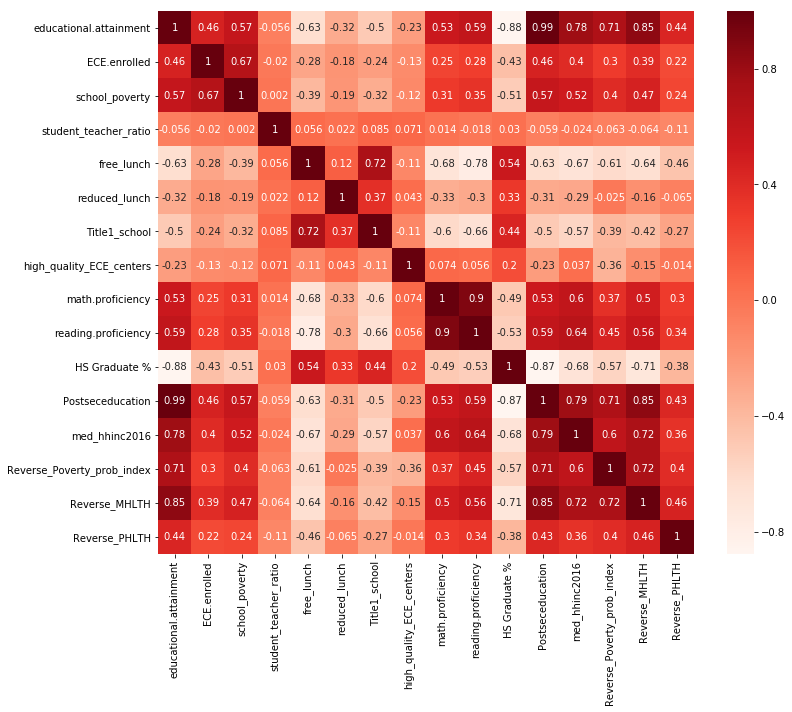

In [3]:
plt.figure(figsize=(12,10))
cor = datasetraw.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [4]:
#xcols=['educational.attainment','ECE.enrolled','school_poverty','student_teacher_ratio','free_lunch','reduced_lunch','Title1_school','high_quality_ECE_centers','math.proficiency','reading.proficiency','Some College %','Associates Degree %','Graduate Degree or Higher %']

xcols=['ECE.enrolled',
       'school_poverty','student_teacher_ratio','free_lunch',
       'reduced_lunch','Title1_school','high_quality_ECE_centers',
       'math.proficiency','reading.proficiency', 'HS Graduate %','Postseceducation']
X=datasetraw[xcols]

#Xnorm =dataset.iloc[:,1:16]
#Xtmp = MinMaxScaler().fit_transform(Xnorm)
#X = pd.DataFrame(Xtmp, columns = Xnorm.columns)

print(X)

      ECE.enrolled  school_poverty  student_teacher_ratio  free_lunch  \
0          1.62404         2.20331               -0.21703     0.25234   
1          1.99337         1.82523                0.11722     0.77992   
2         -0.27516         1.28837                0.11722    -1.98041   
3          1.07005         1.91481                1.06651    -1.06590   
4          1.53171         0.08000                0.01247     0.97218   
5          1.99337         1.55074               -0.34681    -1.98041   
6          0.70072         1.00346                0.11722    -0.69031   
7          1.99337         1.38596               -0.55057    -0.57508   
8         -0.80457         0.63047               -0.00643    -1.45964   
9          1.27029         1.59087               -0.74400    -1.93399   
10         1.99337         2.40554               -0.39999    -1.95393   
11         1.99337         2.40554                0.01247     0.78005   
12         1.10511         1.44447                0

In [5]:
y=datasetraw['med_hhinc2016']
#y=y.values.reshape(-1,1)
#y= MinMaxScaler().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3955777910789132
Mean Squared Error: 0.3359358290994861
Root Mean Squared Error: 0.5795997145439998


In [6]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          med_hhinc2016   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     212.8
Date:                Mon, 13 Apr 2020   Prob (F-statistic):          8.54e-244
Time:                        18:38:54   Log-Likelihood:                -721.04
No. Observations:                 931   AIC:                             1466.
Df Residuals:                     919   BIC:                             1524.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

C:\Users\09066218\AppData\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [7]:
y=datasetraw['Reverse_MHLTH']
#y=y.values.reshape(-1,1)
#y= MinMaxScaler().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3797029788778036
Mean Squared Error: 0.255619373933916
Root Mean Squared Error: 0.505588146552029


In [8]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Reverse_MHLTH   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     264.5
Date:                Mon, 13 Apr 2020   Prob (F-statistic):          1.01e-275
Time:                        18:39:18   Log-Likelihood:                -662.64
No. Observations:                 931   AIC:                             1349.
Df Residuals:                     919   BIC:                             1407.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

C:\Users\09066218\AppData\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [9]:
y=datasetraw['Reverse_PHLTH']
#y=y.values.reshape(-1,1)
#y= MinMaxScaler().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7322390965338016
Mean Squared Error: 0.8497457192141429
Root Mean Squared Error: 0.9218165322959568


In [10]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Reverse_PHLTH   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     31.84
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           2.12e-57
Time:                        18:39:26   Log-Likelihood:                -1158.5
No. Observations:                 931   AIC:                             2341.
Df Residuals:                     919   BIC:                             2399.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

C:\Users\09066218\AppData\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
y=datasetraw['Reverse_Poverty_prob_index']
#y=y.values.reshape(-1,1)
#y= MinMaxScaler().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.45566601935441986
Mean Squared Error: 0.41372152005254337
Root Mean Squared Error: 0.6432118780406215


In [12]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                                OLS Regression Results                                
Dep. Variable:     Reverse_Poverty_prob_index   R-squared:                       0.675
Model:                                    OLS   Adj. R-squared:                  0.672
Method:                         Least Squares   F-statistic:                     173.8
Date:                        Mon, 13 Apr 2020   Prob (F-statistic):          9.17e-216
Time:                                18:39:31   Log-Likelihood:                -793.02
No. Observations:                         931   AIC:                             1610.
Df Residuals:                             919   BIC:                             1668.
Df Model:                                  11                                         
Covariance Type:                    nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

C:\Users\09066218\AppData\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
